<a href="https://colab.research.google.com/github/AbiemwenseMaureenOshobugie/Machine-Learning-in-Finance/blob/main/Bias_variance_tradeoff_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$\text{Bias-Variance Tradeoff in Stock Price Prediction using Scikit-learn}$$

In this project, I explored the bias-variance tradeoff while developing machine learning models to predict stock price movements. The goal was to build robust predictive models that generalize well without overfitting, using Scikit-learn for implementation.

**Problem Definition**

The objective was to predict the daily returns of one stock (MMM) based on the standardized daily returns of another stock (AOS). I used Lasso Regression and polynomial feature transformations to observe how model complexity affects performance, balancing bias and variance. The dataset contained 1138 instances with standardized daily returns from the two stocks.

**Key Steps:**

  - Data Collection and Preprocessing:

I used the yfinance library to scrape stock data and compute the daily returns.
The data was standardized using Scikit-learn's StandardScaler to ensure all features had zero mean and unit variance.

  - Model Building:

I created polynomial features of varying degrees (1, 2, and 3) using Scikit-learn's PolynomialFeatures and fitted a Lasso Regression model for each degree to prevent overfitting.
I evaluated the model's performance by calculating Mean Squared Error (MSE) on both the training and testing sets.

  - Bias-Variance Tradeoff Analysis:

I computed bias and variance for each polynomial model to understand how model complexity affects generalization performance.
The results were plotted, showing the tradeoff between bias and variance as model complexity increased.

**Key Results:**

The model with a polynomial degree of 3 achieved the best balance between bias and variance, with the lowest test MSE of 0.5915.
A visual representation of the bias-variance tradeoff helped identify the optimal polynomial degree, as shown in the plots below.

**Tools and Libraries Used:**

* Python: for general scripting and data handling.

* Pandas & NumPy: for data manipulation and calculations.
Scikit-learn: for feature scaling, model building (Lasso Regression), and evaluation metrics.
* Matplotlib: for visualizing the bias-variance tradeoff and model performance.


This project demonstrated my ability to handle real-world financial data, apply machine learning techniques, and systematically analyze model performance using Scikit-learn. It also illustrates my understanding of core machine learning concepts like the bias-variance tradeoff.

**Keywords**: Bias, Variance, Bias-Variance Tradeoff, Training Error, Testing Error, Degree of Polynomial, Standardized Returns, Linear Regression, Mean Squared Error (MSE), Polynomial, LASSO Regression, S&P 500.


---


<br><br>

# $\text{Optimizing the Bias-Variance Tradeoff}$

* Using the Standardized Daily Returns of AOS and MMM Stock

I used the Standardized Daily Returns of AOS and MMM Stock . The data has 2 features and 1138 instances. More details in the non-technical section.

Firstl, we import the necessary libraries

In [ ]:

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error



In [ ]:
# Read in the URL and scrape ticker data
data_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
tickers = data_table[0]['Symbol'].values.tolist()
tickers = [s.replace('\n', '') for s in tickers]
tickers = [s.replace('.', '-') for s in tickers]
tickers = [s.replace(' ', '') for s in tickers]

# Select the first two stocks: AOS and MMM
selected_tickers = tickers[:2]

# Download prices
prices_list = []
for ticker in selected_tickers:
    try:
        prices = yf.download(ticker, start='2020-01-01', end='2024-07-15', progress=False)['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")

# Concatenate prices into a single DataFrame
if prices_list:
    prices_df = pd.concat(prices_list, axis=1)
    prices_df.sort_index(inplace=True)

# Calculate daily returns
returns_df = prices_df.pct_change().dropna()

returns_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MMM,1138.0,0.000004,0.017859,-0.110350,-0.008676,0.000104,0.008620,0.125986
AOS,1138.0,0.000791,0.019232,-0.086694,-0.010125,0.000688,0.011153,0.136669


In [ ]:
# Standardize the returns
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns_df)

# Convert the scaled returns back to a DataFrame for plotting
scaled_returns_df = pd.DataFrame(scaled_returns, columns=returns_df.columns, index=returns_df.index)
print('\nThe data has', scaled_returns_df.shape[1], 'features and', scaled_returns_df.shape[0],'instances.\n')

# Prepare feature and target variables
X = scaled_returns_df.iloc[:, 0].values.reshape(-1, 1)  # feature: standardized returns of first stock
y = scaled_returns_df.iloc[:, 1].values  # target: standardized returns of second stock

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate bias and variance
def calculate_bias_variance(model, X, y_true):
    y_pred = model.predict(X)
    bias = np.mean((y_true - np.mean(y_pred)) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    return bias, variance

# Lists to store results
degrees = [1, 2, 3]
train_mse = []
test_mse = []
biases = []
variances = []

# Train and evaluate polynomial models of different degrees
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = Lasso(alpha=0.1)  # Set alpha to a reasonable value for Lasso of 0.1
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    bias, variance = calculate_bias_variance(model, X_test_poly, y_test)
    biases.append(bias)
    variances.append(variance)


# Plot the bias-variance tradeoff
max_polynomial_degree = 5
biases_poly = []
variances_poly = []
losses_poly = []

for polynomial_degree in range(1, max_polynomial_degree + 1):
    poly = PolynomialFeatures(polynomial_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = Lasso(alpha=0.1)  # Set alpha to a reasonable value for Lasso
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    bias_poly, variance_poly = calculate_bias_variance(model, X_test_poly, y_test)
    biases_poly.append(bias_poly)
    variances_poly.append(variance_poly)
    losses_poly.append(mean_squared_error(y_test, y_test_pred))

best_polynomial_degree = np.argmin(losses_poly) + 1

# Fit a polynomial regression model of degree 3
degree = 3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = Lasso(alpha=0.1)  # Set alpha to a reasonable value for Lasso
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

print('\nTable 1: Performance Metrics for LASSO Regression Models of Polynomial Degrees 1 to 3\n')
# Convert the results into a DataFrame
results = {
    'Polynomial Model': [f'Degree {d}' for d in degrees],
    'Training MSE': train_mse,
    'Testing MSE': test_mse,
    'Bias': biases,
    'Variance': variances
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Round the values to 4 decimal places
results_df = results_df.round(4)

# Display the DataFrame without the index
results_df



The data has 2 features and 1138 instances.


Table 1: Performance Metrics for LASSO Regression Models of Polynomial Degrees 1 to 3



,Polynomial Model,Training MSE,Testing MSE,Bias,Variance
0,Degree 1,0.7670,0.6023,0.8983,0.2298
1,Degree 2,0.7646,0.6098,0.8984,0.2329
2,Degree 3,0.7585,0.5915,0.8981,0.2211


* Generating the Plots

In [ ]:
# Fig. 3(a): Time series plot of stock prices
fig3a, ax = plt.subplots(figsize=(10, 6))
prices_df.plot(ax=ax)  # Plot directly from the DataFrame, passing the Axes object
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Prices Over Time')
ax.grid(True)
fig3a.suptitle('Fig. 3a: Time Series Plot of Stock Prices')

plt.close(fig3a)  # Prevent immediate display



# Fig. 3(b): Scatter Plot of Standardized Daily Returns
fig3b, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(scaled_returns_df.iloc[:, 0], scaled_returns_df.iloc[:, 1], alpha=0.5)
ax1.set_xlabel(f'Standardized Daily Returns of {selected_tickers[0]}')
ax1.set_ylabel(f'Standardized Daily Returns of {selected_tickers[1]}')
ax1.set_title('Scatter Plot of Standardized Daily Returns for AOS and MMM Stocks')
ax1.grid(True)
fig3b.suptitle('Fig. 3b: Scatter Plot of Standardized Daily Returns')

plt.close(fig3b)  # Prevent immediate display

# Fig. 4: Polynomial Regression Models of Degrees 1 to 3
fig4, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(X, y, alpha=0.5, label='Data')
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.fit_transform(X_range)
    model = Lasso(alpha=0.1)
    model.fit(poly.fit_transform(X_train), y_train)
    y_range_pred = model.predict(X_range_poly)
    ax2.plot(X_range, y_range_pred, label=f'Degree {degree} Model')
ax2.set_xlabel(f'Standardized Daily Returns of {selected_tickers[0]}')
ax2.set_ylabel(f'Standardized Daily Returns of {selected_tickers[1]}')
ax2.set_title('Polynomial LASSO Regression Models on Standardized Daily Returns')
ax2.legend()
ax2.grid(True)
fig4.suptitle('Fig. 4: LASSO Regression Models of Polynomial Degrees 1 to 3')
plt.close(fig4)  # Prevent immediate display

# Fig. 5: Checking the Model Fitting: Residual for Training and Testing Data
fig5, (ax3_1, ax3_2) = plt.subplots(1, 2, figsize=(12, 6))
ax3_1.scatter(y_train_pred, train_residuals, alpha=0.5)
ax3_1.axhline(y=0, color='r', linestyle='--')
ax3_1.set_xlabel('Predicted Values')
ax3_1.set_ylabel('Residuals')
ax3_1.set_title('Residuals vs Predicted Values (Training Set)')
ax3_1.grid(True)
ax3_2.scatter(y_test_pred, test_residuals, alpha=0.5)
ax3_2.axhline(y=0, color='r', linestyle='--')
ax3_2.set_xlabel('Predicted Values')
ax3_2.set_ylabel('Residuals')
ax3_2.set_title('Residuals vs Predicted Values (Testing Set)')
ax3_2.grid(True)
fig5.suptitle('Fig.5: Checking the Model Fitting: Residuals for Training and Testing Data')
plt.tight_layout()
plt.close(fig5)  # Prevent immediate display

# Fig. 6: Bias-Variance Tradeoff
fig6, ax4 = plt.subplots(figsize=(10, 6), dpi=90)
ax4.plot(np.arange(1, max_polynomial_degree + 1), biases_poly, color="g", label="Bias", zorder=1)
ax4.plot(np.arange(1, max_polynomial_degree + 1), losses_poly, color="k", linestyle="--", label="Loss", zorder=1)
ax4.set_ylabel("Bias / Loss", color="g")
ax4.set_ylim(0, 1)
ax4.set_xlabel("Complexity (Polynomial Degree)")
ax4.set_title("Bias-Variance Tradeoff")
ax4.grid(visible=True, zorder=0)
ax5 = ax4.twinx()
ax5.plot(np.arange(1, max_polynomial_degree + 1), variances_poly, color="b", label="Variance", zorder=1)
ax5.set_ylabel("Variance", color="b")
ax5.set_ylim(0, 1)
ax5.grid(visible=False)
lines, labels = ax4.get_legend_handles_labels()
lines2, labels2 = ax5.get_legend_handles_labels()
combined_lines = lines + lines2 + [plt.Line2D([0], [0], color='r', linestyle='--')]
combined_labels = labels + labels2 + [f'Best Degree {best_polynomial_degree}']
ax4.legend(combined_lines, combined_labels, loc='lower right')
ax4.axvline(x=best_polynomial_degree, color='r', linestyle='--', zorder=2)
fig6.suptitle('Fig. 6: Bias-Variance Tradeoff')
plt.tight_layout()
plt.close(fig6)  # Prevent immediate display

# Store figures
stored_fig3a = fig3a
stored_fig3b = fig3b
stored_fig4 = fig4
stored_fig5 = fig5
stored_fig6 = fig6


## **5. Summary and Conclusion**



In the analytical part of issue 2: Bias-variance tradeoff, we examined the relationship between standardized daily returns of AOS and MMM from the S&P 500 companies with the aim to understanding how an increase in the complexity of the model will impact the training and testing errors and the bias and variance using LASSO regression models of varying polynomial degrees. The steps undertaken are:

1. Scraping ticker data from Wikipedia for the S&P 500 companies.
Downloading the adjusted close prices for the first two stocks (AOS and MMM) using yfinance.

2. Calculating the daily returns of the two stocks. This gives us very few data points. Standardizing the daily returns using StandardScaler to ensure they have mean = 0, standard deviation = 1 and more data points for better visualization.

3. Visualizing the data points. In **Fig. 3(a)**, AOS exhibited a consistent upward trend, indicating positive performance during the observed period with an average returns of 0.0791%. On the other hand, MMM experienced a sharp increase in stock price up until June 2021, after which it entered a downward trajectory and an average returns of 0.0004%. This divergence in stock movements highlights the different market responses of the two companies. The scatter plot in **Fig. 3(b)** further reveals a moderate positive correlation between the standardized daily returns of AOS and MMM (with a correlation coefficient of 0.51), suggesting that when AOS performs well, MMM tends to follow suit





**Bias-Variance Tradeoff: Model Complexity vs. Performance**

The evaluation metrics used for assessing model performance are **Training MSE, Testing MSE, Variance**, and **Bias**:

* **Training MSE** reflects the model's fit on the training data. A lower value indicates better performance on the data it was trained on.

* **Testing MSE**  measures the model's ability to generalize to out-of-sample data, with lower values indicating better generalization.

* **Bias** measures the average difference between the model's predictions and the actual values. Lower bias suggests that the model's predictions are close to the actual values.

* **Variance** captures the consistency of the model's predictions. A lower variance implies that the model produces stable, consistent predictions.

From Fig. 4, we observe how different polynomial degrees affect the regression model:

* Degree 1 results in a straight-line model.

* Degree 2 forms a parabolic curve.

* Degree 3 forms an "S"-shaped curve.

Each model captures the relationship between the standardized daily returns differently, as shown by the scatter plot of the returns (dots).

**Key Insights from Table 1:**

* The Degree 3 model outperforms the others, with the lowest values across all evaluation metrics. This suggests that it captures the complex relationship between the returns with both low error and consistent predictions.

* The Degree 2 model, while showing a slight improvement in training MSE, underperforms overall, with the highest testing error, variance, and bias.

* The Degree 1 model performs poorly in training error but demonstrates relatively stable variance and bias, indicating it may be oversimplified but offers more consistent predictions than the Degree 2 model.

**Metric Ranges:**

* Training MSE ranges from **0.7585** to **0.7670**.

* Testing MSE ranges from **0.5915** to **0.6098**, showing that the models generalize fairly well to the test data.

* Bias shows minimal variation, ranging from **0.8981** to **0.8984** across the models.

* Variance fluctuates more, with values between **0.2211** and **0.2329**, indicating that higher-degree models reduce the variability in predictions.


At this point, the results clearly demonstrate that the **Degree 3 polynomial model** provides the best fit for both in-sample and out-of-sample data. There is no evidence of overfitting or underfitting, as seen from the residuals plotted in **Fig. 5**. The residuals are randomly distributed with no discernible patterns, and they are centered around zero on both axes—an indication of a well-fitted model.

**Key Observations:**

* From **Fig. 6** (Bias-Variance Tradeoff), we observe that as model complexity increases, variance (blue line) also increases, leading to a corresponding increase in test error (black dashed line). However, bias (green line) remains relatively unchanged across the models.

* The optimal model for the data is clearly marked by the **Degree 3 polynomial** (red line), where the balance between bias and variance is most favorable.

**Conclusion:**

In this analysis, we applied predictive modeling to examine the standardized daily returns of AOS (predictor) to predict MMM (target) using LASSO regression models with varying polynomial degrees. The focus on the bias-variance tradeoff revealed the importance of balancing these two factors to achieve an optimal model that generalizes well to unseen data. The Degree 3 model strikes the ideal balance, providing a good fit without overfitting or underfitting.

## **6. Plots and Visuals**

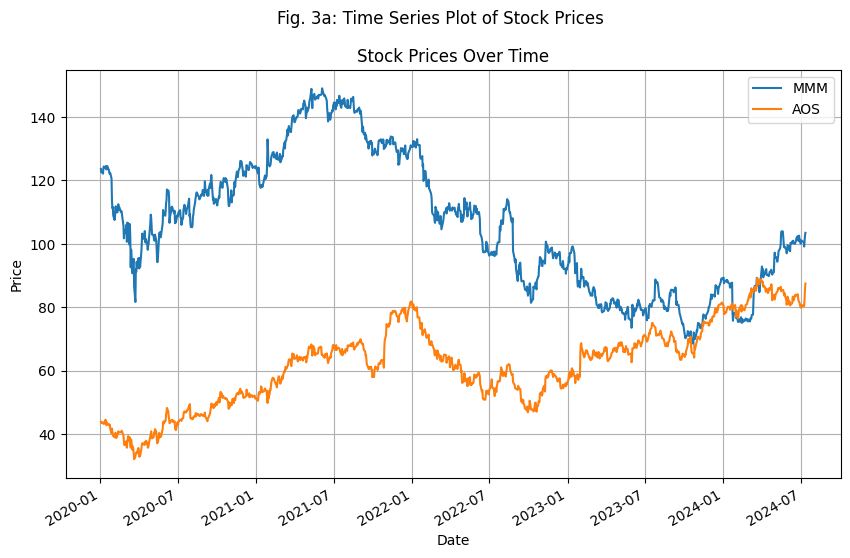

In [ ]:
display(stored_fig3a)

*During the observed period, AOS exhibited an overall upward trend in its stock price. In contrast, MMM experienced an initial price increase, reaching a peak around June 2021, followed by a subsequent decline*

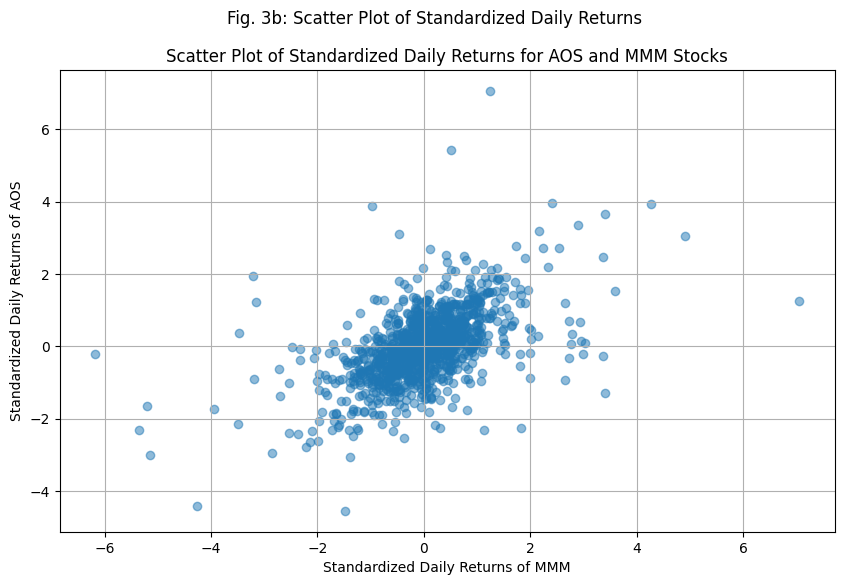

In [ ]:
display(stored_fig3b)

*The scatter plot shows an upward movement in the standardize returns of AOS and MMM indicating the relationship between both returns is positive.*

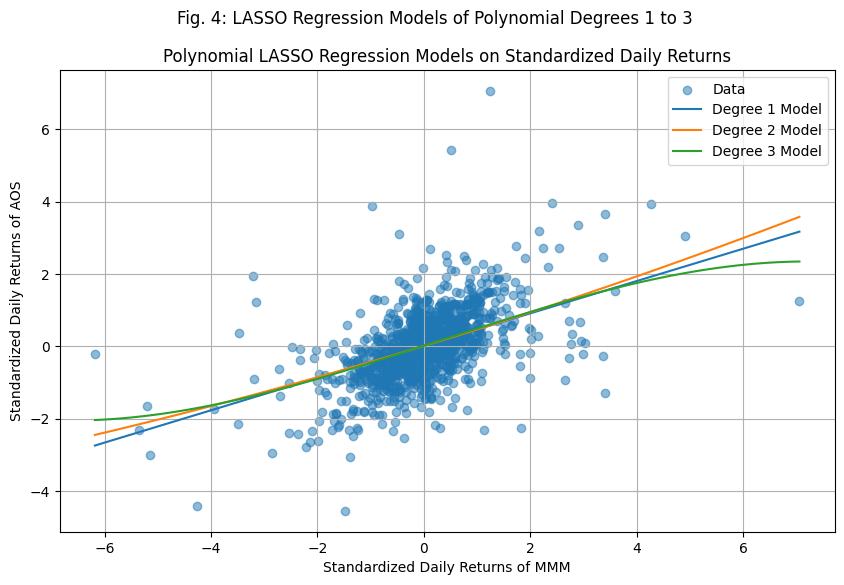

In [ ]:
display(stored_fig4)

*Degree 1 model is a straight line, Degree 2 model is a slightly convex parabolic, and Degree 3 model is an "S"-shaped curve. The Dots are the standardized daily returns.*

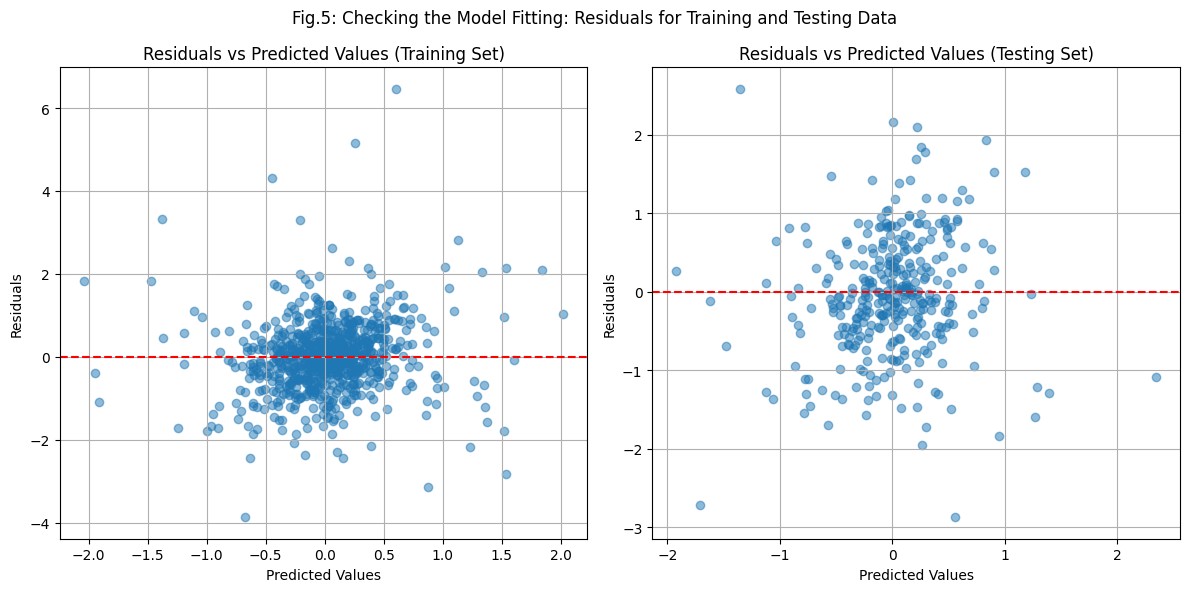

In [ ]:
display(stored_fig5)

*There are no clear patterns in the distributions of the residuals and the residuals are concentrated more around the zeroes of both axes indicating good fits.*

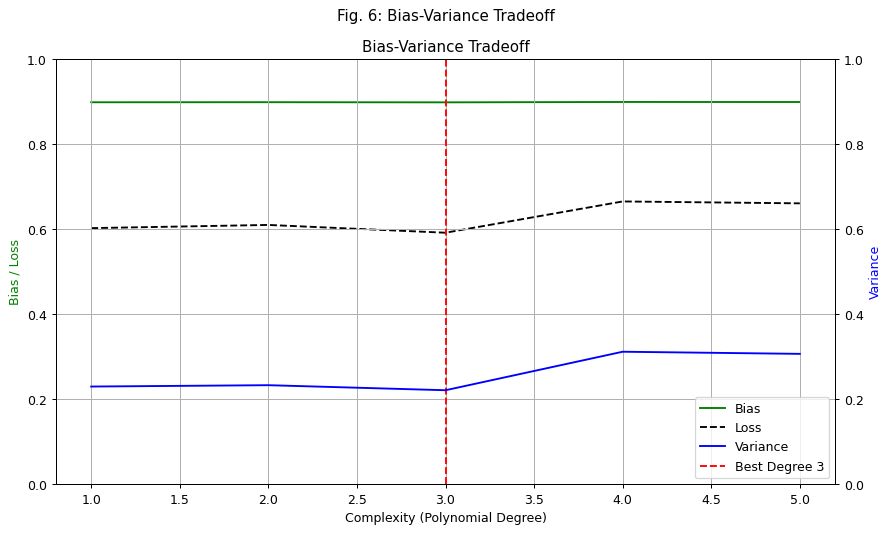

In [ ]:
display(stored_fig6)

*As the complexity of the model increases, variance (blue) increases. Test error (black) increases in relation to variance. On the other hand, bias (green) exhibits no significant changes. The optimal fit for the data is provided by Degree 3 (red).*



# $\text{References}$



Doroudi, Shayan. "The Bias-Variance Tradeoff: How Data Science Can Inform Educational Debates." AERA Open, vol. 6, no. 4, 2020, pp. 1-18. SAGE Publications, doi:10.1177/2332858420977208.

Fortmann-Roe, Scott. "Understanding the Bias-Variance Tradeoff." June 2012, http://scott.fortmann-roe.com/docs/BiasVariance.html.

"Bias + Variance Tradeoff 2.1 Linear Regression Model." CSE 416: Machine Learning, University of Washington, Spring 2022, https://courses.cs.washington.edu/courses/cse416/22sp/lectures/2/lecture_2.pdf.

Guan, Xingquan, and Henry Burton. "Bias-Variance Tradeoff in Machine Learning: Theoretical Formulation and Implications to Structural Engineering Applications." Structural Safety, vol. 92, 2024, 102145. Elsevier, https://doi.org/10.1016/j.strusafe.2022.102145.

Ostertagova, Eva. Modelling Using Polynomial Regression. Procedia Engineering, vol. 48, Dec. 2012, pp. 500–506. DOI: 10.1016/j.proeng.2012.09.545. License: CC BY-NC-ND 3.0. Technical University of Kosice - Technicka univerzita v Kosiciach. ResearchGate, https://www.researchgate.net/publication/256089416_Modelling_Using_Polynomial_Regression.

